In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2

In [2]:
data = pd.read_csv("/dataset/CdF_shade/campo_fiori.csv") 

In [4]:
appendix = pd.read_csv("/dataset/CdF_shade/appendix.csv") 

In [6]:
frameW = appendix['frameW'][0]
frameH = appendix['frameH'][0]
blocks = 16

In [7]:
width = np.arange(0, frameW, frameW/blocks)
height = np.arange(0, frameH, frameH/blocks)

In [8]:
heatmap = np.zeros((blocks,blocks)) 

In [9]:
for a in range(len(data)):
    for b1 in range(blocks):
        if width[b1] - (frameW/(blocks*2)) <= data['coordX'].values[a] < width[b1] + (frameW/(blocks*2)):
            for b2 in range(blocks):
                if height[b2] - (frameH/(blocks*2)) <= data['coordY'].values[a] < height[b2] + (frameW/(blocks*2)):
                    heatmap[b1,b2] += 1

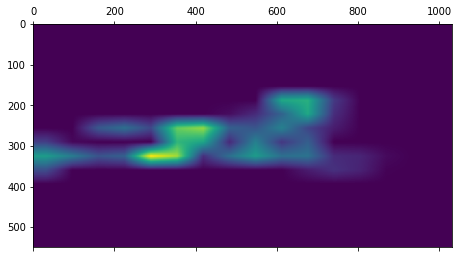

In [ ]:
heatmap = cv2.resize(heatmap, (frameW,frameH))
plt.matshow(heatmap)
plt.show()
heatmapshow = None
heatmapshow = cv2.normalize(heatmap, heatmapshow, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
heatmapshow = cv2.applyColorMap(heatmapshow, cv2.COLORMAP_JET)
cv2.imshow("Heatmap", heatmapshow)
cv2.waitKey(0)